In [2]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import seaborn as sns
import utils

In [32]:
feature_vector_length = 784
num_classes = 10

# # Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_test = np.concatenate( [X_test , X_train[:20000]])
Y_test = np.concatenate([Y_test , Y_train[:20000] ])
X_train = X_train[20000:]
Y_train = Y_train[20000:]
# # Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)/255.0
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)/255.0


print( X_train.shape , Y_train.shape)

(40000, 784) (40000,)


In [ ]:
def show_imgs(x_test, decoded_imgs=None, n=10,s=28):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(s,s))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(s,s))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()



In [23]:
combined = list(zip(X_train , Y_train))
random.shuffle(combined)

X_train[:], Y_train[:] = zip(*combined)


In [25]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

In [26]:
ypreds = clf.predict(X_test)
print("accuracy in test set : " , accuracy_score( Y_test , ypreds ))

ypreds

accuracy in test set :  0.9676


array([7, 2, 1, ..., 1, 4, 2], dtype=uint8)

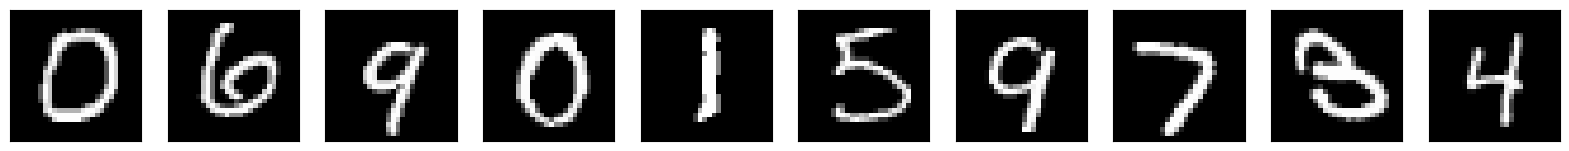

prediction of test set 
[0 6 9 0 1 5 9 7 3 4]


In [27]:
show_imgs(X_test[10:20])
print("prediction of test set ")
print(ypreds[10 : 20 ])

In [28]:
ypreds_train = clf.predict(X_train[:2000])
print("accuracy in train set : " , accuracy_score( Y_train[:2000] , ypreds_train ))
ypreds_train

accuracy in train set :  0.9525


array([2, 3, 7, ..., 5, 2, 9], dtype=uint8)

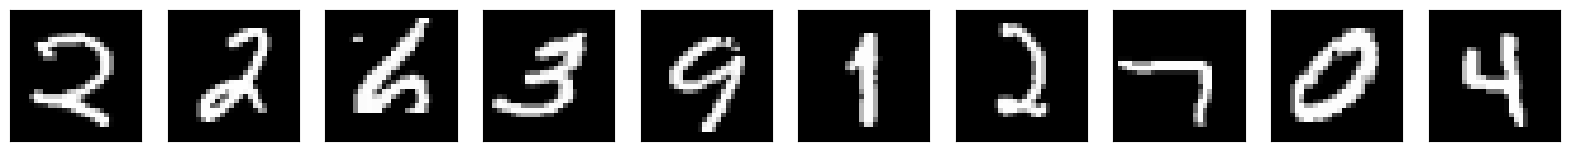

prediction of train set 
[2 2 6 3 9 1 2 7 0 4]


In [29]:
show_imgs(X_train[10:20])
print("prediction of train set ")
print(ypreds_train[10 : 20 ])

(5958, 784)
zero class :


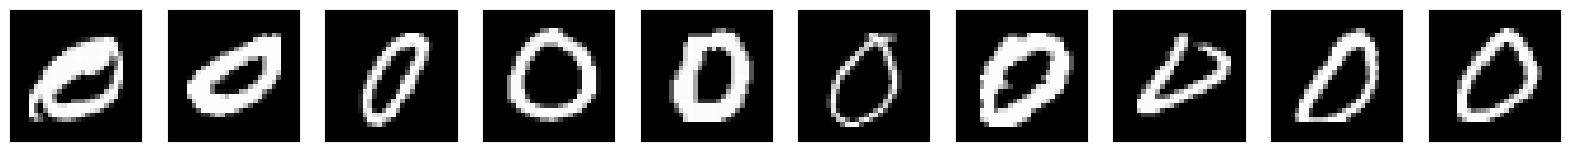

One class :


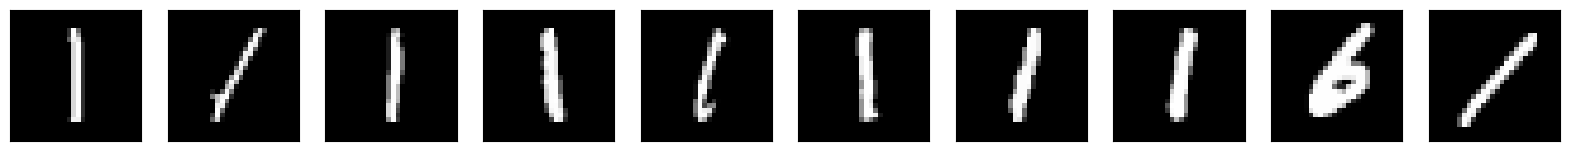

In [9]:
def MakeDict( X , Y):
    Dict = {}
    for i in range(10):
        Dict[i] = []
        
    for i in range(X.shape[0]):
        Dict[Y[i]].append(X[i])
        
    for k in Dict.keys():
        Dict[k] = np.array(Dict[k])
        
    return Dict

image_data = MakeDict( X_train , Y_train )
print(image_data[2].shape)
print("zero class :")
show_imgs(image_data[0][10:20])

print("One class :")
show_imgs(image_data[1][10:20])